Install & Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Upload an Image in Colab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving image.png to image (1).png


Read the Image

In [ ]:
img = cv2.imread('image.png')
print(img.shape)



(1024, 1536, 3)


Display Image Correctly (BGR → RGB)

(np.float64(-0.5), np.float64(1535.5), np.float64(1023.5), np.float64(-0.5))

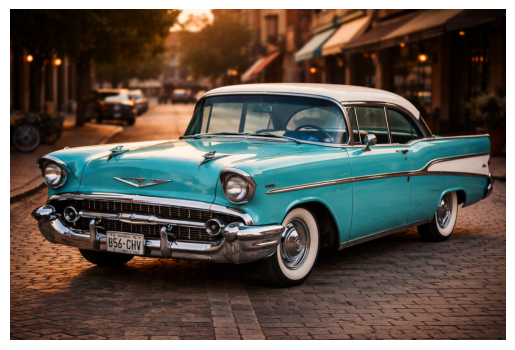

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')


Image as Pixel Matrix

In [ ]:
print(img_rgb)


[[[ 1  0  1]
  [ 0  0  0]
  [ 1  0  0]
  ...
  [ 8  4  2]
  [ 8  4  3]
  [ 8  3  2]]

 [[ 1  0  0]
  [ 1  0  0]
  [ 1  0  0]
  ...
  [ 8  4  3]
  [ 9  3  3]
  [ 7  2  2]]

 [[ 1  0  1]
  [ 1  0  0]
  [ 1  0  0]
  ...
  [ 9  4  3]
  [ 9  4  3]
  [ 8  3  3]]

 ...

 [[65 40 29]
  [62 37 28]
  [62 37 27]
  ...
  [52 33 26]
  [52 33 27]
  [51 32 26]]

 [[65 39 29]
  [62 37 28]
  [59 36 27]
  ...
  [51 33 27]
  [49 33 27]
  [49 33 26]]

 [[62 40 30]
  [61 37 28]
  [58 36 27]
  ...
  [50 33 27]
  [48 33 28]
  [48 36 30]]]


In [ ]:
print(img_rgb[100, 50])   # row, column


[6 2 2]


Convert RGB to Grey


(np.float64(-0.5), np.float64(1535.5), np.float64(1023.5), np.float64(-0.5))

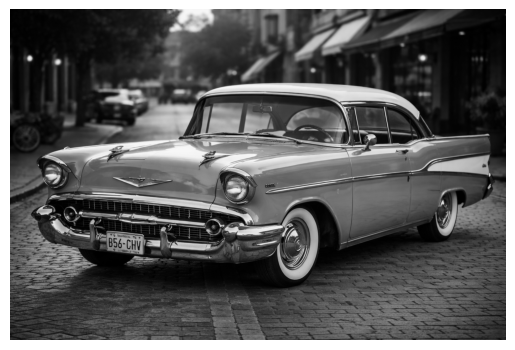

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')


In [ ]:
print(gray.shape)


(1024, 1536)


Convert Grayscale → RGB

(np.float64(-0.5), np.float64(1535.5), np.float64(1023.5), np.float64(-0.5))

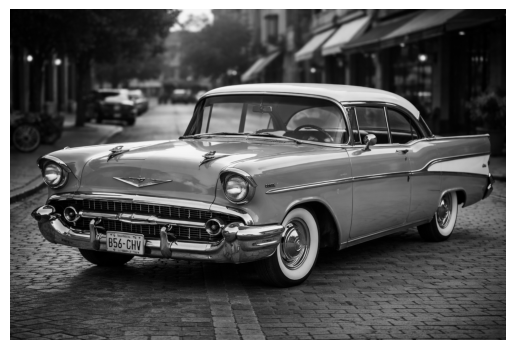

In [ ]:
gray_to_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

plt.imshow(gray_to_rgb)
plt.axis('off')


Detect Edges

(np.float64(-0.5), np.float64(1535.5), np.float64(1023.5), np.float64(-0.5))

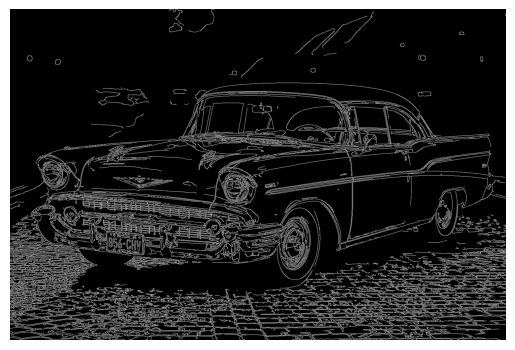

In [ ]:
edges = cv2.Canny(gray, 50, 150)

plt.imshow(edges, cmap='gray')
plt.axis('off')


Detect Lines (Hough Line Transformation)

(np.float64(-0.5), np.float64(1535.5), np.float64(1023.5), np.float64(-0.5))

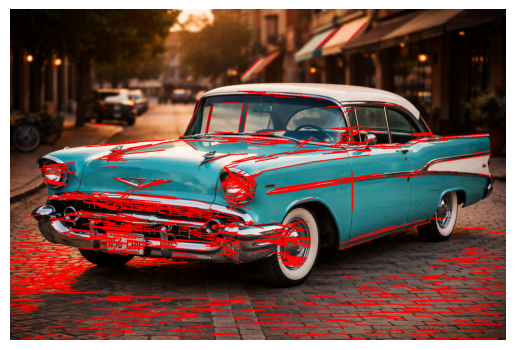

In [ ]:
lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi/180,
    threshold=100,
    minLineLength=50,
    maxLineGap=10
)

line_img = img_rgb.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1,y1), (x2,y2), (255,0,0), 2)

plt.imshow(line_img)
plt.axis('off')


Detect Blur using Laplacian

In [ ]:
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap_abs = np.abs(lap)


Threshold to Keep Only Clear Parts

In [ ]:
_, sharp_mask = cv2.threshold(lap_abs, 5, 255, cv2.THRESH_BINARY)
sharp_mask = sharp_mask.astype(np.uint8)

Clean the Mask


In [ ]:
kernel = np.ones((3,3), np.uint8)
sharp_mask = cv2.morphologyEx(sharp_mask, cv2.MORPH_CLOSE, kernel)


Apply Mask → Remove Blurred Regions

In [ ]:
sharp_only = cv2.bitwise_and(img_rgb, img_rgb, mask=sharp_mask)


Show Result

(np.float64(-0.5), np.float64(1535.5), np.float64(1023.5), np.float64(-0.5))

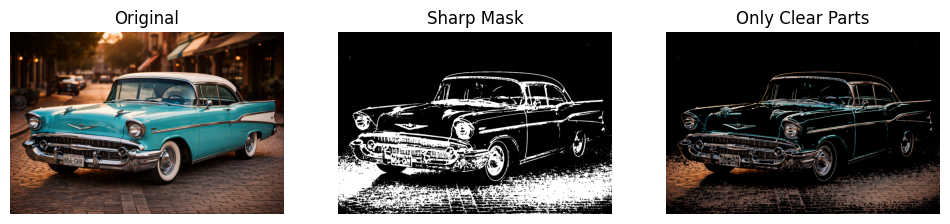

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Sharp Mask")
plt.imshow(sharp_mask, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Only Clear Parts")
plt.imshow(sharp_only)
plt.axis("off")


Plot Grayscale Histogram (Method 1 – OpenCV)

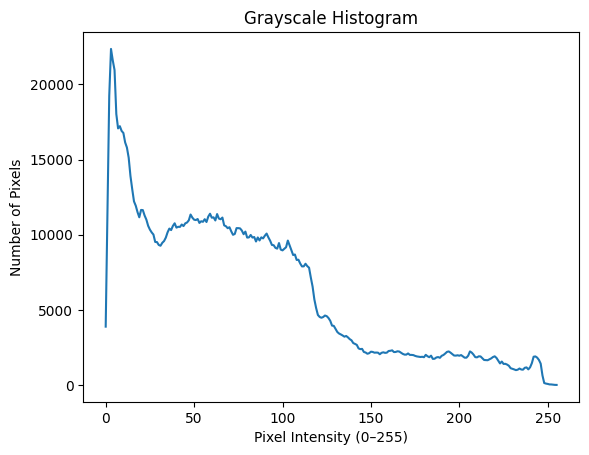

In [ ]:
hist = cv2.calcHist([gray], [0], None, [256], [0,256])

plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Number of Pixels")
plt.show()


### Histogram Equalization

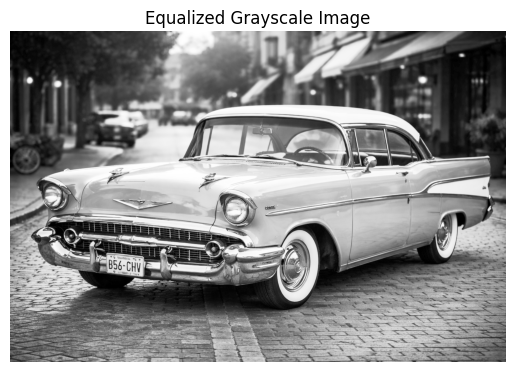

In [ ]:
equalized_gray = cv2.equalizeHist(gray)

plt.imshow(equalized_gray, cmap='gray')
plt.title('Equalized Grayscale Image')
plt.axis('off')
plt.show()

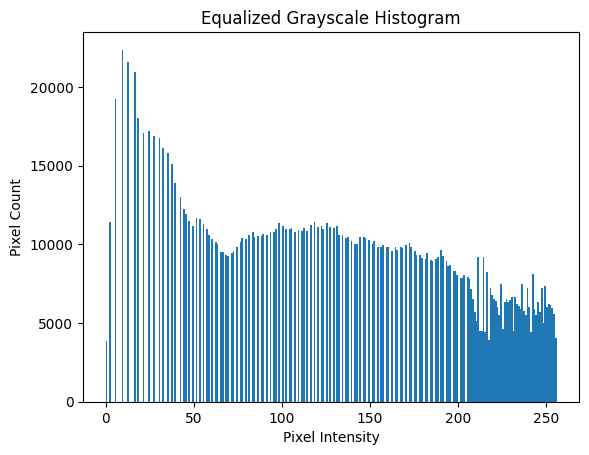

In [ ]:
plt.hist(equalized_gray.ravel(), bins=256, range=[0,256])
plt.title('Equalized Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.show()

Plot Histogram (Method 2 – NumPy)

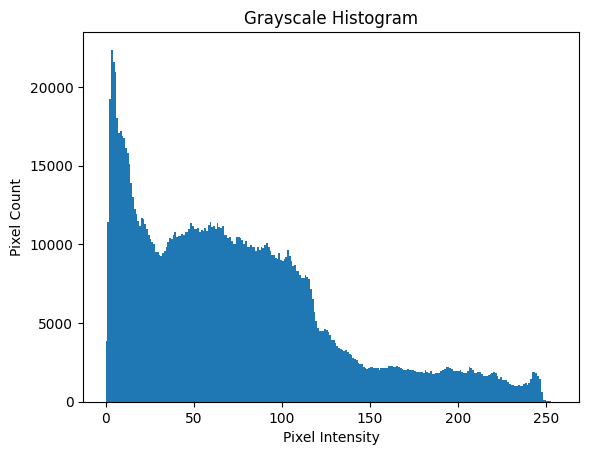

In [ ]:
plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.show()


Histogram of Clear (Sharp) Areas Only

In [ ]:
sharp_pixels = gray[sharp_mask > 0]


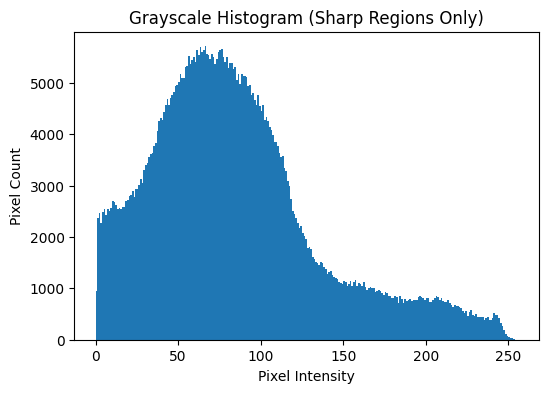

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(sharp_pixels, bins=256, range=[0,256])
plt.title("Grayscale Histogram (Sharp Regions Only)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.show()


Compare Original vs Sharp

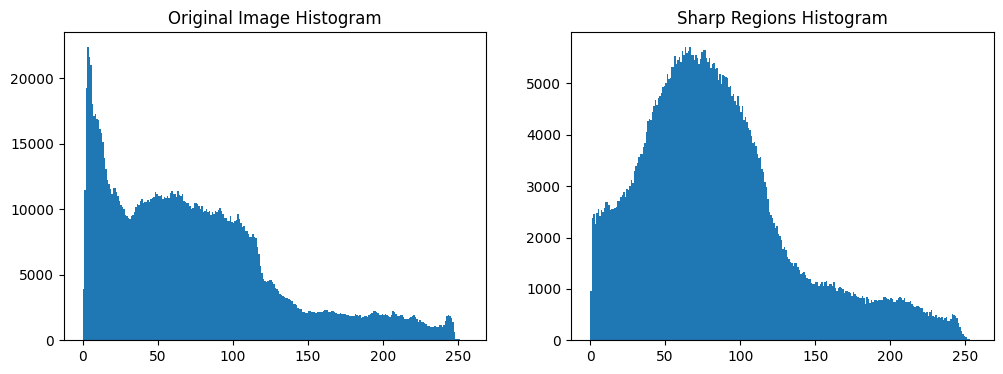

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.title("Original Image Histogram")

plt.subplot(1,2,2)
plt.hist(sharp_pixels, bins=256, range=[0,256])
plt.title("Sharp Regions Histogram")

plt.show()
